In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download theblackmamba31/landscape-image-colorization


 93% 178M/192M [00:07<00:00, 17.8MB/s]
100% 192M/192M [00:07<00:00, 27.0MB/s]


In [ ]:
! unzip landscape-image-colorization.zip

Streaming output truncated to the last 5000 lines.
  inflating: landscape Images/gray/2914.jpg  
  inflating: landscape Images/gray/2915.jpg  
  inflating: landscape Images/gray/2916.jpg  
  inflating: landscape Images/gray/2917.jpg  
  inflating: landscape Images/gray/2918.jpg  
  inflating: landscape Images/gray/2919.jpg  
  inflating: landscape Images/gray/292.jpg  
  inflating: landscape Images/gray/2920.jpg  
  inflating: landscape Images/gray/2921.jpg  
  inflating: landscape Images/gray/2922.jpg  
  inflating: landscape Images/gray/2923.jpg  
  inflating: landscape Images/gray/2924.jpg  
  inflating: landscape Images/gray/2925.jpg  
  inflating: landscape Images/gray/2926.jpg  
  inflating: landscape Images/gray/2927.jpg  
  inflating: landscape Images/gray/2928.jpg  
  inflating: landscape Images/gray/2929.jpg  
  inflating: landscape Images/gray/293.jpg  
  inflating: landscape Images/gray/2930.jpg  
  inflating: landscape Images/gray/2931.jpg  
  inflating: landscape Images/g

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imread, imshow
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.layers import Conv2D, MaxPool2D, UpSampling2D, Input, LeakyReLU, InputLayer, Conv2DTranspose
from keras.models import Sequential

from tensorflow.keras.optimizers import SGD
import shutil
import os


In [ ]:
TRAIN_ROOT_DIR = "/content/landscape_Images/colored" 
DEST = "/content/trainer/images" 

if not os.path.exists(DEST):
  os.makedirs(DEST)


for dir in os.listdir(TRAIN_ROOT_DIR):
  for img in os.listdir(os.path.join(TRAIN_ROOT_DIR, dir)):
    ORG = os.path.join(TRAIN_ROOT_DIR, dir, img)
    try:
     
      imread(ORG)
  
      shutil.copy(ORG, DEST)
     
    except:
      print(f"the image at {ORG} cannot be used ")

In [ ]:
len(os.listdir("/content/trainer/images"))

7129

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255, 
                                   featurewise_center = True, 
                                   rotation_range = 40, 
                                   horizontal_flip = True, 
                                   vertical_flip = True,
                                   featurewise_std_normalization = True)

# tilted images due to image augmentation- dont need to do since main aim is to train to color image

In [ ]:
train  = train_datagen.flow_from_directory("/content/trainer",
                                           target_size = (256,256),
                                           batch_size = 500, 
                                           shuffle = True)


Found 7129 images belonging to 1 classes.


In [ ]:
t_img, label = train.next()

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
def plotImage(img_arr, label):

  plt.figure(figsize = (5,5))

  for im, l in zip(img_arr, label):
    
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis('off')
    plt.show()

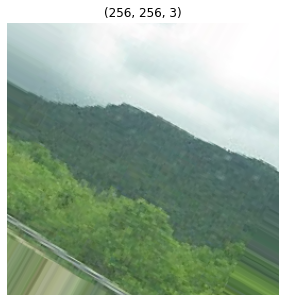

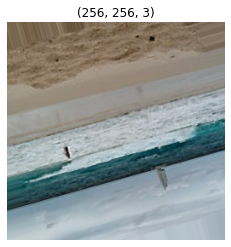

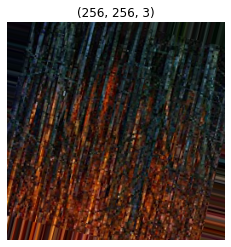

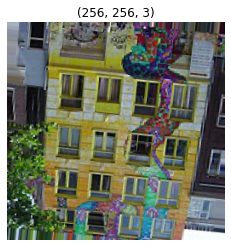

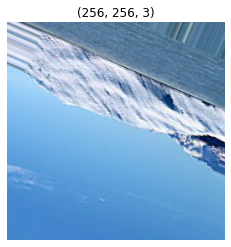

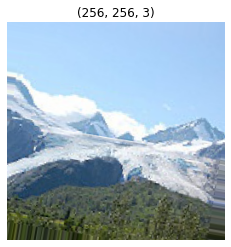

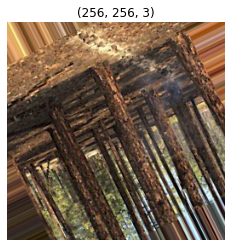

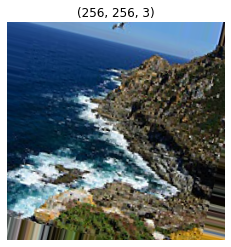

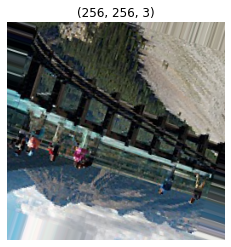

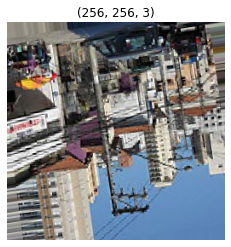

In [ ]:
plotImage(t_img[:10], label[:10])

In [ ]:
X = []
Y = []

In [ ]:
for img in t_img:
  try:
    lab =rgb2lab(img)
    X.append(lab[:,:,0])
    Y.append(lab[:,:,1:]/128)
  except:
    print("error")

In [ ]:
X_train = np.array(X)
X_train = np.expand_dims(X_train, axis = len(X_train.shape))

Y_train = np.array(Y)

In [ ]:
X_train.shape, Y_train.shape

((500, 256, 256, 1), (500, 256, 256, 2))

In [ ]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))



In [ ]:
# model.compile(optimizer= 'adam', metrics= ['acc'], loss = 'mse')
# opt = SGD(lr=0.01)
# model.compile(optimizer = opt, metrics= ['acc'], loss = 'mse')
# Finish model
model.compile(optimizer='rmsprop',metrics = ['acc'], loss='mse')

In [ ]:
his = model.fit(X_train, Y_train, epochs= 100, batch_size= 32, steps_per_epoch= X_train.shape[0]//32, verbose= 1)

Epoch 1/100
15/15 [==============================] - 57s 4s/step - loss: 0.0976 - acc: 0.5271
Epoch 2/100
15/15 [==============================] - 53s 4s/step - loss: 0.0128 - acc: 0.5599
Epoch 3/100
15/15 [==============================] - 53s 4s/step - loss: 0.0125 - acc: 0.5763
Epoch 4/100
15/15 [==============================] - 53s 4s/step - loss: 0.0114 - acc: 0.6034
Epoch 5/100
15/15 [==============================] - 53s 4s/step - loss: 0.0121 - acc: 0.5768
Epoch 6/100
15/15 [==============================] - 53s 4s/step - loss: 0.0124 - acc: 0.5609
Epoch 7/100
15/15 [==============================] - 53s 4s/step - loss: 0.0119 - acc: 0.6060
Epoch 8/100
15/15 [==============================] - 53s 4s/step - loss: 0.0111 - acc: 0.6222
Epoch 9/100
15/15 [==============================] - 53s 4s/step - loss: 0.0111 - acc: 0.6267
Epoch 10/100
15/15 [==============================] - 53s 3s/step - loss: 0.0108 - acc: 0.6309
Epoch 11/100
15/15 [==============================] - 53s 4

In [ ]:
model.save("./bestmodel.h5")

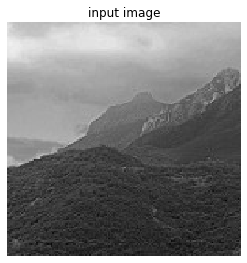

In [ ]:
img1_color = []

path = "/content/in7.jpg"
img = img_to_array(load_img(path, target_size=(256, 256, 3)))/255
plt.title("input image")
imshow(img)
plt.axis("off")
plt.show()


In [ ]:
img1_color.append(img)
img1_color = rgb2lab(img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))


In [ ]:
op = model.predict(img1_color)
op = op*128


In [ ]:
res = np.zeros((256, 256, 3))
res[:,:,0] = img1_color[0][:,:,0]
res[:,:,1:] = op[0]

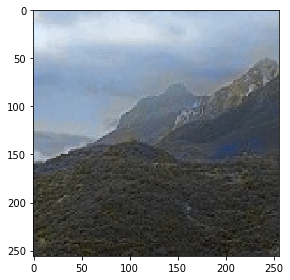

In [ ]:
imshow(lab2rgb(res))